In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

# Import Dataset

In [16]:
transaction_data = pd.read_excel(open("Data Analyst - 500 sample data of Freelancers.xlsx", 'rb'),
                                 sheet_name = "Transaction Data")
freelancer_data = pd.read_excel(open("Data Analyst - 500 sample data of Freelancers.xlsx", 'rb'),
                                 sheet_name = "Freelancer Data")

In [17]:
print(transaction_data.info())
print(transaction_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5885 entries, 0 to 5884
Data columns (total 12 columns):
FL Code                    5885 non-null int64
Job Code                   5885 non-null int64
Shift Code                 5885 non-null object
Working Date               5885 non-null datetime64[ns]
Confirmed Total Income     5885 non-null int64
Confirmed Working Hours    5884 non-null float64
Starting Working Time      3876 non-null object
Ending Working Time        3660 non-null object
Planned starting hour      5885 non-null object
Planned ending hour        5885 non-null object
Self-checkin               5885 non-null object
Self-checkout              5885 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 551.8+ KB
None
   FL Code  Job Code Shift Code Working Date  Confirmed Total Income  \
0    85338     79623     yytkba   2019-09-25                       0   
1    85338     79623     9ajus6   2019-09-26                  234000   
2    68

In [18]:
print(freelancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
FL Code                   500 non-null int64
Registered Date           500 non-null object
Verified Date             500 non-null object
1st day of transaction    500 non-null datetime64[ns]
Most Recent Date          500 non-null datetime64[ns]
Total Working Hours       500 non-null int64
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 23.6+ KB
None


In [19]:
# Find the person who don't have working time
transaction_data[transaction_data["Confirmed Working Hours"].isnull()]

,FL Code,Job Code,Shift Code,Working Date,Confirmed Total Income,Confirmed Working Hours,Starting Working Time,Ending Working Time,Planned starting hour,Planned ending hour,Self-checkin,Self-checkout
3081,58595,97226,zjjdpe,2019-09-10,90000,NaN,NaN,NaN,2019-09-10T13:30:00,2019-09-10T17:30:00,yes,no


# Question
## 1. Caculation. 
### What was Viec Co's revenue from 2019-08-14 to 2019-09-26? Which FL had the highest income during this period?						


In [20]:
revenue = np.sum(transaction_data['Confirmed Total Income'])
print("The Viec Co's revenue from 2019-08-14 to 2019-09-26 is " +str(revenue) + " VND")

The Viec Co's revenue from 2019-08-14 to 2019-09-26 is 730020706 VND


In [21]:
fl_max_income = max(transaction_data['Confirmed Total Income'])
fl_code_max_income = []
for index, row in transaction_data.iterrows():
    if row["Confirmed Total Income"] == fl_max_income:
        fl_code_max_income = row["FL Code"]
print("The freelancer had the highest income during this period who had the code {} with {} VND".format(fl_max_income,fl_code_max_income))
      

The freelancer had the highest income during this period who had the code 599625 with 95232 VND


### What was the overall Show-up rate from 2019-08-14 to 2019-09-26? Which FL had the highest Show-up rate?	
* The definition for show-up rate is the total number of times a freelancer had showed up to work divided by the total number of times he/ she was scheduled to work. That A freelancer had showed up to work means he/ she was physically present at the job site.
* Show-up rate = $\frac{Show-upQty}{ScheduledQty}$

In [22]:
# The people who not showed up in job site will have Confirmed Working Hours = 0
# Count the quantity of Scheduled Job
scheduled_Quantity = np.count_nonzero(transaction_data['Confirmed Working Hours'])
# Count the Showed up Job
showedup_Quantity = len(transaction_data['Confirmed Working Hours'])
# Caculate the overall show-up rate
overall_Showup_Rate = round(scheduled_Quantity/showedup_Quantity,2)

print('The overall Show-up rate from 2019-08-14 to 2019-09-26 is: {}'.format(overall_Showup_Rate))

The overall Show-up rate from 2019-08-14 to 2019-09-26 is: 0.65


In [23]:
# Find the FL had the highest show-up rate

# Find the non-zero Confirmed Working Hours	Starting = showed up at job site
count_fl_data_showed_up = transaction_data.groupby(['FL Code']).agg(lambda x: x.eq(0).sum())
count_fl_data_scheduled = transaction_data.groupby(['FL Code']).count()
finding_fl_highest = count_fl_data_scheduled
finding_fl_highest['Show up rate'] = count_fl_data_showed_up['Confirmed Total Income']/count_fl_data_scheduled['Planned starting hour']

#finding_fl_highest.max(level = 'Show up rate')
finding_fl_highest.loc[finding_fl_highest['Show up rate'] == max(finding_fl_highest['Show up rate'])]

,Job Code,Shift Code,Working Date,Confirmed Total Income,Confirmed Working Hours,Starting Working Time,Ending Working Time,Planned starting hour,Planned ending hour,Self-checkin,Self-checkout,Show up rate
FL Code,,,,,,,,,,,,
94399,32,32,32,32,32,1,0,32,32,32,32,0.96875


FL with code 94399 had the highest Show up rate with 0.96875

### What other insights can you draw from the provided datasets?

In [24]:
count_transaction_data = transaction_data.groupby(['Working Date']).count()
transaction_data.groupby(['Working Date']).count()

,FL Code,Job Code,Shift Code,Confirmed Total Income,Confirmed Working Hours,Starting Working Time,Ending Working Time,Planned starting hour,Planned ending hour,Self-checkin,Self-checkout
Working Date,,,,,,,,,,,
2019-08-14,3,3,3,3,3,2,2,3,3,3,3
2019-08-15,11,11,11,11,11,10,10,11,11,11,11
2019-08-16,18,18,18,18,18,15,15,18,18,18,18
2019-08-17,27,27,27,27,27,19,19,27,27,27,27
2019-08-18,32,32,32,32,32,23,21,32,32,32,32
2019-08-19,45,45,45,45,45,35,35,45,45,45,45
2019-08-20,62,62,62,62,62,49,46,62,62,62,62
2019-08-21,62,62,62,62,62,50,49,62,62,62,62
2019-08-22,74,74,74,74,74,59,59,74,74,74,74


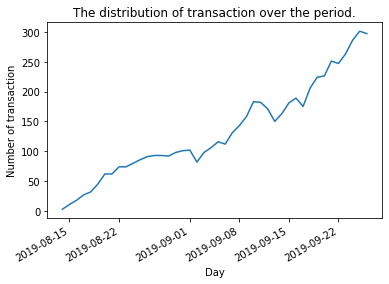

In [25]:
fig, ax = plt.subplots()
ax.plot(count_transaction_data["Shift Code"]) #Make a graph
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
plt.xlabel('Day')
plt.ylabel('Number of transaction')
ax.set_title('The distribution of transaction over the period.')
plt.show() #Show a graph

The graph show that our transaction per day witnessed a steady growth over the given period.

#### 2. Viecco's Show-up rate

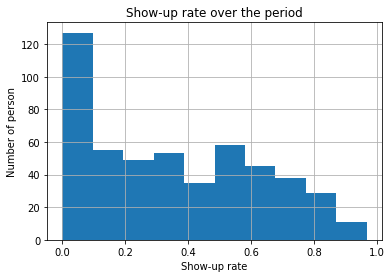

In [34]:
finding_fl_highest.hist('Show up rate');
plt.title('Show-up rate over the period');
plt.xlabel('Show-up rate');
plt.ylabel('Number of person');

The show-up rate graph seem like left-skew, it's mean our FL working well overall, they rarely to accepted a job but don't go to the job site.

## 2. Insurance project for Freelancer

- Viec.Co plans to buy insurance for Freelancers to mitigate the risk that a Freelancer could face while working. Based on the following data, which segment would you recommend? Other recommendations/ insights are welcome.
- Implemetation plan & Draft of policy. Please refer to an insurance proposal here 
https://drive.google.com/file/d/0B1_lVC7MdDssQ1VVODU0X0owc1RaSkx3ZGhjUHFPR2g5eXJr/view

In [13]:
#Describe Transaction Data
transaction_data.describe()

,FL Code,Job Code,Confirmed Total Income,Confirmed Working Hours
count,5885.000000,5885.000000,5885.000000,5884.000000
mean,59638.002209,71191.953441,124047.698556,4.712186
std,23024.667381,23329.018108,102948.178977,3.863114
min,22272.000000,23262.000000,0.000000,0.000000
25%,39866.000000,43435.000000,0.000000,0.000000
50%,57379.000000,79623.000000,123750.000000,5.000000
75%,79838.000000,88725.000000,222750.000000,8.000000
max,99947.000000,98837.000000,599625.000000,20.500000


Key point: Average income per transaction is 124047.698556

In [35]:
# Describe Freelancer Data
freelancer_data.describe()

,FL Code,Total Working Hours
count,500.000000,500.00000
mean,61690.388000,54.98600
std,22979.161796,59.73745
min,22272.000000,1.00000
25%,43454.250000,15.00000
50%,62533.500000,33.00000
75%,82735.250000,72.25000
max,99947.000000,309.00000


In [51]:
fl_working_income = transaction_data.groupby("FL Code").agg({"Confirmed Working Hours": np.sum, "Confirmed Total Income": np.sum})
mean_income = np.mean(fl_working_income['Confirmed Total Income'])
mean_working_hours = np.mean(fl_working_income['Confirmed Working Hours'])
print("Average the FL income are {} and they work almost {} hours per 1,5 months".format(mean_income,mean_working_hours))
print("Average Viecco's net profit per each FL in 1,5 months is {}".format(mean_income*0.2))

Average the FL income are 1460041.412 and they work almost 55.453 hours per 1,5 months
Average Viecco's net profit per each FL in 1,5 months is 292008.2824


Before we explore our data, we need to calculate the average insurance cost per month (CPM) of each segment

- 3 months: CPM = 153,000/3 = 51,000 (VND) -> For 500 FL = 51,000 * 500 * 3 = 76.500.000
- 6 months: CPM = 229,000/6 = 38,167 (VND)  -> For 500 FL = 38,167 * 500 * 6 = 114.501.000
- 12 months: CPM = 392,000/12 = 32,67 (VND) -> For 500 FL = 32,670  * 500 * 12 = 196.020.000

Over 42 days (~1.5 months), we earned average comission fee 124047.698556 *20% = __24,800 (VND)__ from the company per transaction

__Problem__: Find the best practice insurance segments for our FL.
-  After calculate, I found that 6 months insurance is suitable for our FL, because it maximize our benefit 
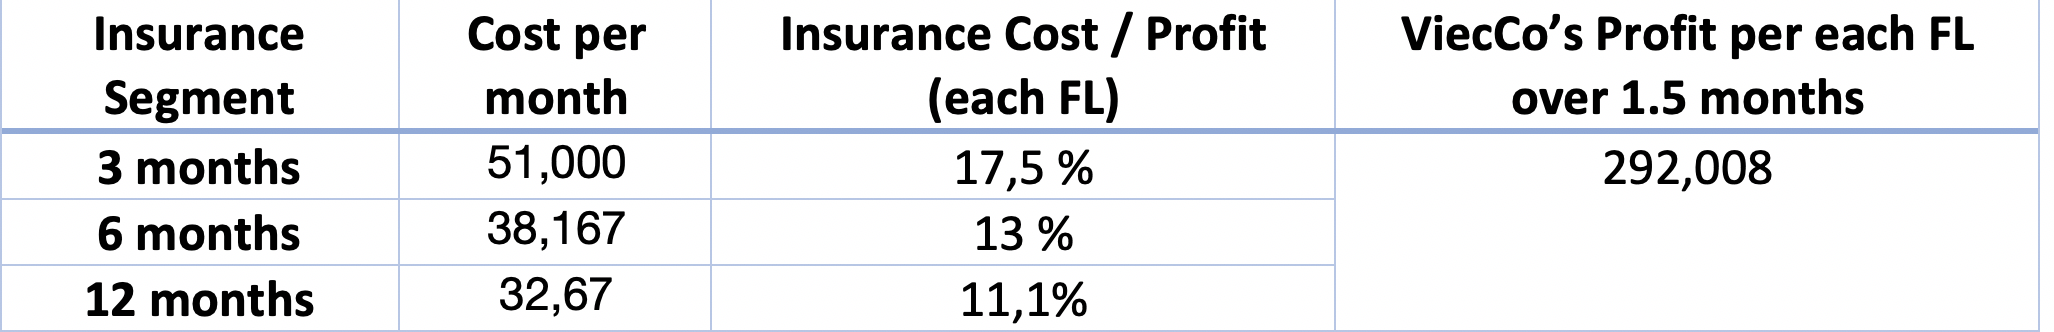